In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

sns.set(style='darkgrid')
%matplotlib inline

In [41]:
stock = pd.read_csv('./Dataset/AAPL.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [42]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [43]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.set_index('Date', drop=True, inplace=True)

In [44]:
stock_start_2005 = stock.loc['2005-01-01':]
stock_start_2005.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.967744,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.977682,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.986245,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.987009,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.058875,2227450400


In [45]:
stock_start_2005 = stock_start_2005['Close']

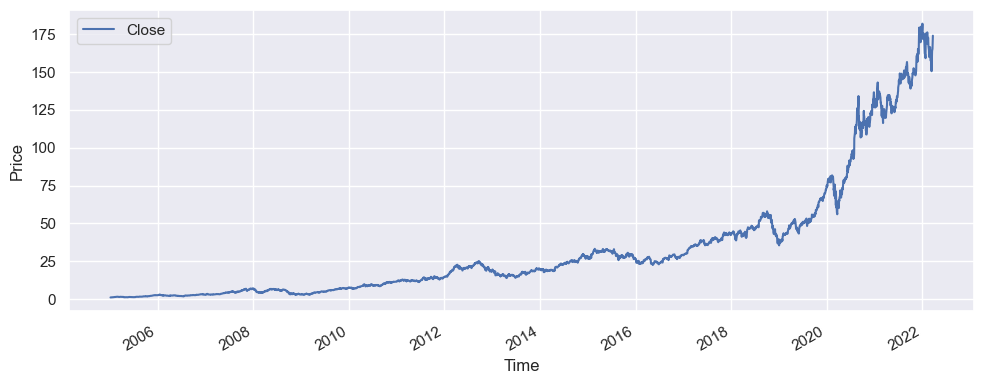

In [46]:
plt.figure(figsize=(10, 4))
stock_start_2005.plot(label='Close', legend=True)
plt.xlabel('Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [15]:
train_data, test_data = stock_start_2005.iloc[:4000], stock_start_2005.iloc[4000:]
train_data.shape, test_data.shape

((4000,), (337,))

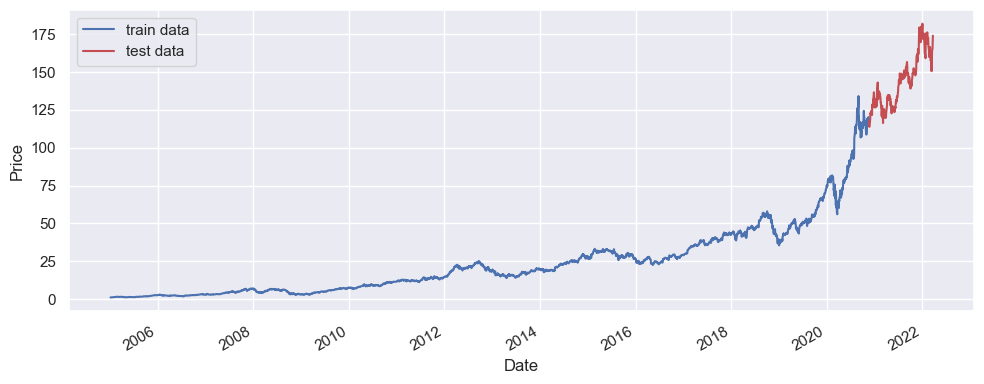

In [16]:
plt.figure(figsize=(10, 4))
train_data.plot(label='train data', legend=True, color='b')
test_data.plot(label='test data', legend=True, color='r')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [11]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    
    for i in range(len(dataset) - time_step -1):
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i+time_step, 0])

    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 5
train_data = np.array(train_data.values).reshape(-1, 1)
test_data = np.array(test_data.values).reshape(-1, 1)

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3994, 5), (3994,), (331, 5), (331,))

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
def create_model():
    model = Sequential([
        LSTM(64, input_shape=(5, 1)),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss=MeanSquaredError(),
        metrics=[RootMeanSquaredError()]
    )
    
    return model

In [29]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/50
125/125 [==============================] - 9s 12ms/step - loss: 1076.5248 - root_mean_squared_error: 32.8104
Epoch 2/50
125/125 [==============================] - 1s 6ms/step - loss: 1028.5653 - root_mean_squared_error: 32.0713
Epoch 3/50
125/125 [==============================] - 1s 6ms/step - loss: 955.5609 - root_mean_squared_error: 30.9121
Epoch 4/50
125/125 [==============================] - 1s 6ms/step - loss: 855.5469 - root_mean_squared_error: 29.2497
Epoch 5/50
125/125 [==============================] - 1s 9ms/step - loss: 763.0598 - root_mean_squared_error: 27.6235
Epoch 6/50
125/125 [==============================] - 1s 11ms/step - loss: 694.4254 - root_mean_squared_error: 26.3520
Epoch 7/50
125/125 [==============================] - 2s 18ms/step - loss: 634.3130 - root_mean_squared_error: 25.1856
Epoch 8/50
125/125 [==============================] - 2s 17ms/step - loss: 583.0723 - root_mean_squared_error: 24.1469
Epoch 9/50
125/125 [==============================

In [31]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 8ms/step


In [32]:
print('RMSE Training: ', np.sqrt(mean_squared_error(y_train, train_predict)))
print('RMSE Testing: ', np.sqrt(mean_squared_error(y_test, test_predict)))

RMSE Training:  5.3582026776653
RMSE Testing:  67.03824063438802


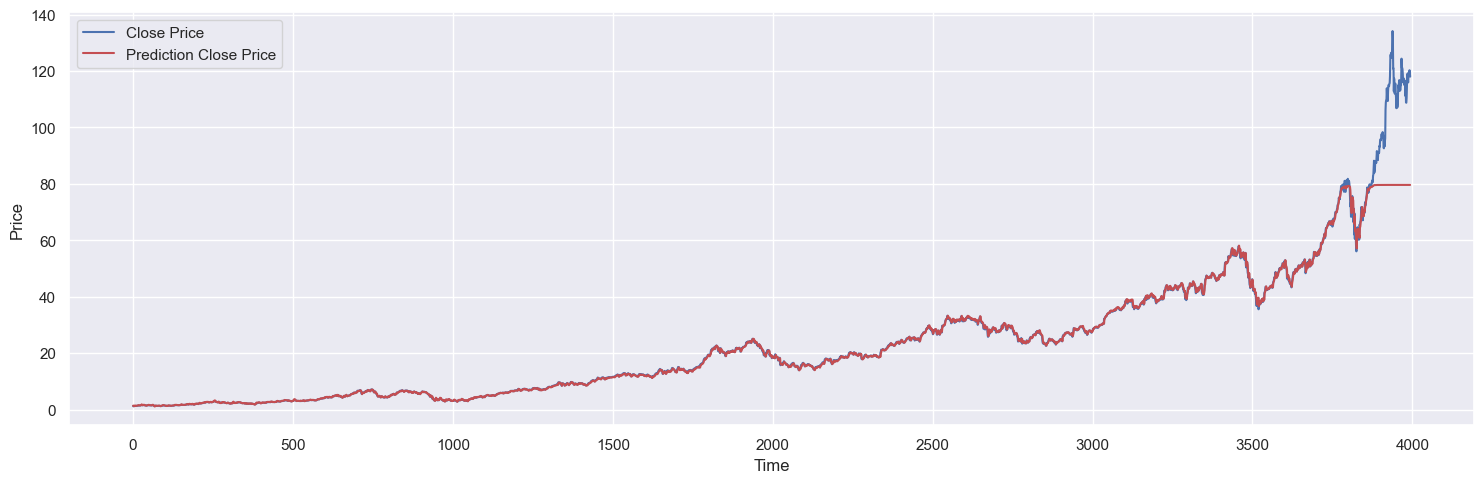

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(y_train, label='Close Price', color='b')
plt.plot(train_predict, label='Prediction Close Price', color='r')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

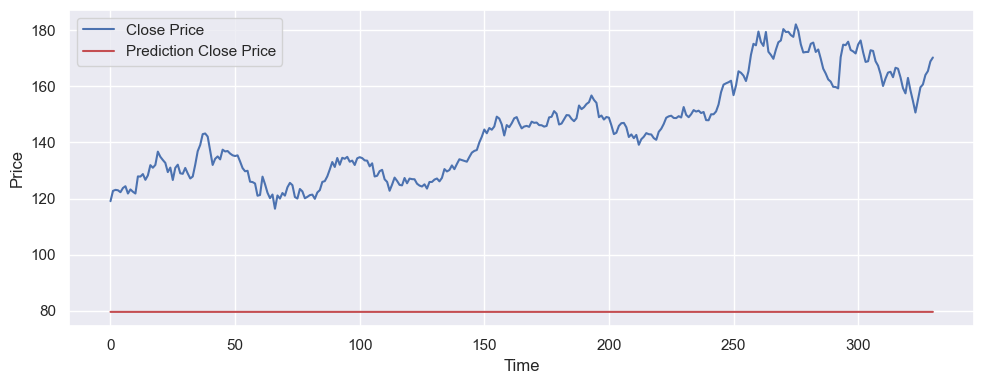

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Close Price', color='b')
plt.plot(test_predict, label='Prediction Close Price', color='r')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## Feature Normalization

In [8]:
dataset = stock_start_2005.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
dataset_scaled = scaler.fit_transform(dataset)

In [9]:
train_data, test_data = dataset_scaled[:4000], dataset_scaled[4000:]
train_data.shape, test_data.shape

((4000, 1), (337, 1))

In [13]:
time_step = 5

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


X_train.shape, X_test.shape

((3994, 5, 1), (331, 5, 1))

In [47]:
def create_model():
    model = Sequential([
        LSTM(64, input_shape=(5, 1)),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss=MeanSquaredError(),
        metrics=[RootMeanSquaredError()]
    )
    
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=5, verbose=1)

Epoch 1/5
125/125 [==============================] - 11s 24ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345
Epoch 2/5
125/125 [==============================] - 2s 16ms/step - loss: 0.0049 - root_mean_squared_error: 0.0699
Epoch 3/5
125/125 [==============================] - 2s 17ms/step - loss: 6.8481e-04 - root_mean_squared_error: 0.0262
Epoch 4/5
125/125 [==============================] - 2s 17ms/step - loss: 5.3683e-05 - root_mean_squared_error: 0.0073
Epoch 5/5
125/125 [==============================] - 2s 17ms/step - loss: 4.1629e-05 - root_mean_squared_error: 0.0065


In [18]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 4ms/step


In [19]:
print('RMSE Training: ', np.sqrt(mean_squared_error(y_train, train_predict)))
print('RMSE Testing: ', np.sqrt(mean_squared_error(y_test, test_predict)))

RMSE Training:  0.006479640844348562
RMSE Testing:  0.024897082494072267


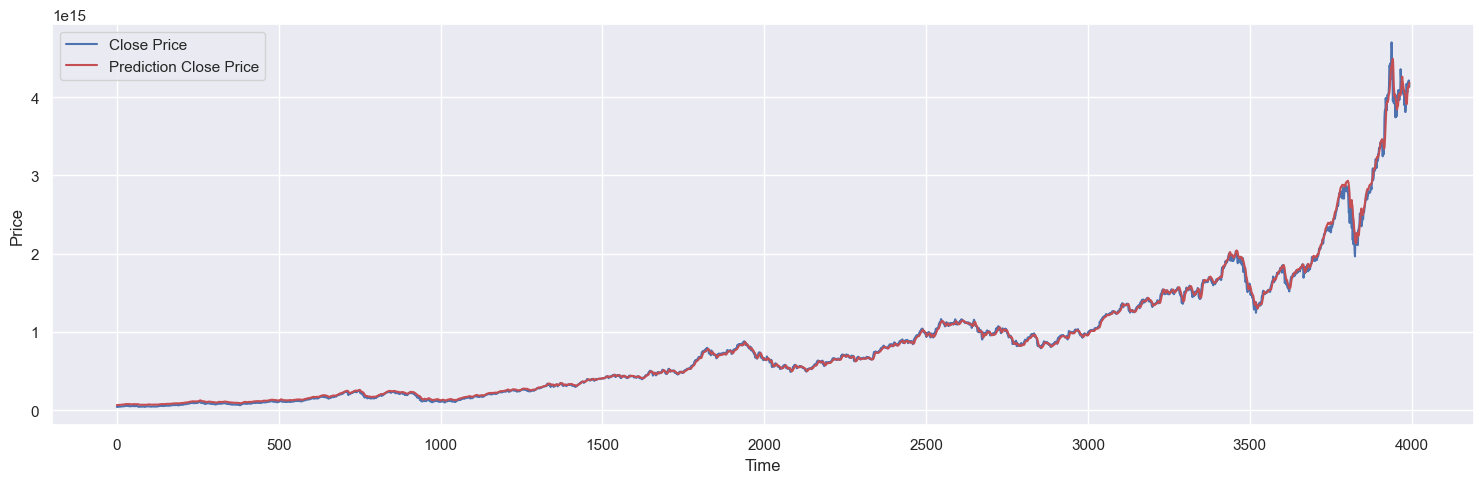

In [39]:
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
train_predict = scaler.inverse_transform(train_predict)

plt.figure(figsize=(15, 5))
plt.plot(y_train, label='Close Price', color='b')
plt.plot(train_predict, label='Prediction Close Price', color='r')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

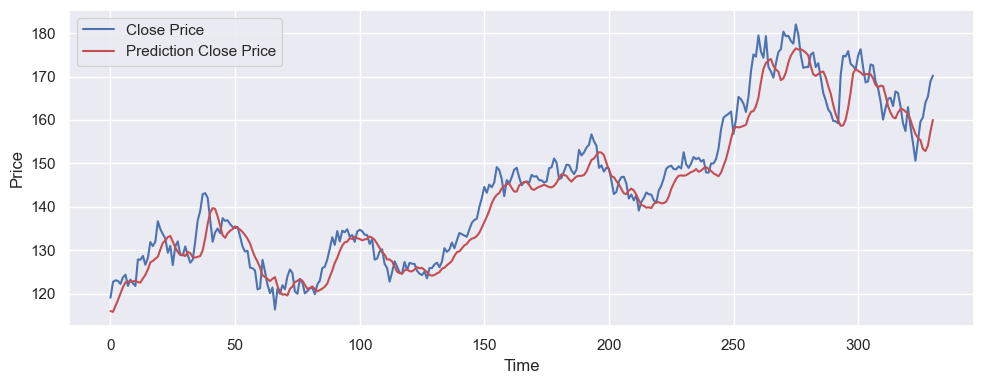

In [28]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Close Price', color='b')
plt.plot(test_predict, label='Prediction Close Price', color='r')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.tight_layout()
plt.show()